In [ ]:
# import data management
import numpy as np
import pandas as pd
# from google.colab import files
from collections import Counter

# import visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# import data processing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_regression


# import models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# import performance metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

# import basic functions
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# setting
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
clear_output()

In [ ]:
# read in pretty data
df_title = pd.read_csv("pre_process.csv")
df_title.drop('title',axis=1)
df_title.head()

,title,studio,genres,numVotes,directors,category,primaryName,title_lc,contentRate,rlYr,type,rlMnth,rnTimeMin,gross,imdbRtCnt,imdbRtBest,imdbRtWorst,imdbRtAvg,slRateCnt,slRateAvg
0,Final Analysis,WB,drama|romance|thriller,14993,nm0423333,actor,Richard Gere,final analysis (1992),r,1992.00000,movie,2.00000,124,28590665,15005.00000,10.00000,1.00000,5.90000,1.00000,2.50000
1,The Bachelor,NL,comedy|romance,18805,nm0802551,actor,Chris O'Donnell,bachelor the (1999),pg-13,1999.00000,movie,11.00000,101,21760240,18821.00000,10.00000,1.00000,5.00000,11.00000,2.55000
2,Death to Smoochy,WB,comedy|crime|drama,42069,nm0000362,actor,Robin Williams,death to smoochy (2002),r,2002.00000,movie,3.00000,109,8364691,42091.00000,10.00000,1.00000,6.30000,11.00000,3.32000
3,Killer Joe,LD,crime|thriller,81892,nm0001243,actor,Matthew McConaughey,killer joe (2011),unrated,2012.00000,movie,6.00000,102,1987762,81990.00000,10.00000,1.00000,6.70000,1.00000,4.50000
4,Invincible,BV,drama,4487,nm0001348,actor,Jouko Ahola,invincible (2001),NaN,NaN,NaN,NaN,133,57806952,NaN,NaN,NaN,NaN,1.00000,3.50000


In [ ]:
# look at descriptive analytics of numerical columns
# NOTE: This matches the [summary.mean, summary.min, summary.max, summary.count] from ana_code_dinh.scala
# NOTE: Recreated for visualization and graphing support
df_title.head()
df_title.describe(exclude = 'object')

,numVotes,rlYr,rlMnth,rnTimeMin,gross,imdbRtCnt,imdbRtBest,imdbRtWorst,imdbRtAvg,slRateCnt,slRateAvg
count,6392.00000,5363.00000,5363.00000,6392.00000,6392.00000,5395.00000,5395.00000,5395.00000,5395.00000,6383.00000,6383.00000
mean,108181.51205,1999.60787,6.61253,107.38251,38618891.15926,110770.19055,10.00000,1.00000,6.56285,13.48911,3.18717
std,197259.54232,12.56185,3.44604,18.95071,61904214.69609,202341.14924,0.00000,0.00000,0.93659,25.57258,0.79017
min,21.00000,1915.00000,1.00000,26.00000,252.00000,21.00000,10.00000,1.00000,1.30000,1.00000,0.50000
25%,12569.50000,1993.00000,4.00000,95.00000,2508462.50000,12986.50000,10.00000,1.00000,6.00000,2.00000,2.75000
50%,39063.50000,2001.00000,7.00000,104.00000,16789289.00000,40628.00000,10.00000,1.00000,6.60000,4.00000,3.30000
75%,114609.25000,2008.00000,10.00000,117.00000,47538293.75000,116823.50000,10.00000,1.00000,7.20000,13.00000,3.75000
max,2814806.00000,2023.00000,12.00000,366.00000,760507625.00000,2819259.00000,10.00000,1.00000,9.30000,329.00000,5.00000


In [ ]:
# view basic stats of categorical features
df_title.describe(exclude = ['float64', 'int64'])

,title,studio,genres,directors,category,primaryName,title_lc,contentRate,type
count,6392,6390,6392,6392,6392,6392,6392,5333,5395
unique,6112,329,715,2759,5,2502,6343,16,1
top,Peter Pan,WB,drama,nm0000095,actor,Nicolas Cage,heaven (2002),r,movie
freq,6,588,767,42,4667,36,3,2475,5395


In [ ]:
# view column information
df_title.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        6392 non-null   object 
 1   studio       6390 non-null   object 
 2   genres       6392 non-null   object 
 3   numVotes     6392 non-null   int64  
 4   directors    6392 non-null   object 
 5   category     6392 non-null   object 
 6   primaryName  6392 non-null   object 
 7   title_lc     6392 non-null   object 
 8   contentRate  5333 non-null   object 
 9   rlYr         5363 non-null   float64
 10  type         5395 non-null   object 
 11  rlMnth       5363 non-null   float64
 12  rnTimeMin    6392 non-null   int64  
 13  gross        6392 non-null   int64  
 14  imdbRtCnt    5395 non-null   float64
 15  imdbRtBest   5395 non-null   float64
 16  imdbRtWorst  5395 non-null   float64
 17  imdbRtAvg    5395 non-null   float64
 18  slRateCnt    6383 non-null   float64
 19  slRate

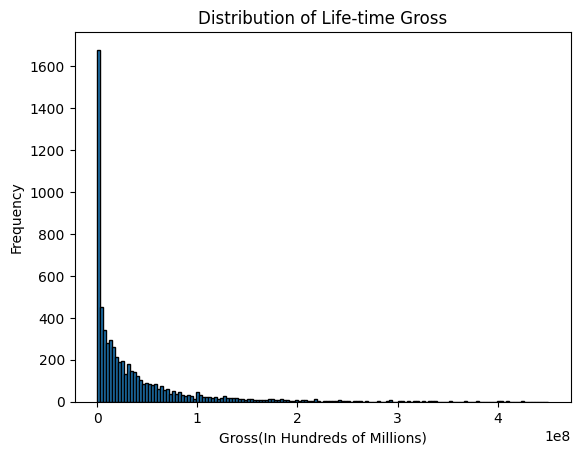

In [ ]:
# view distribution of variable of interest (gross)
# cutoff at 500Million for readability -> max is approx 750Million
plt.hist(df_title['gross'], range= (0, 450000000), bins = 150, edgecolor='black')
plt.title('Distribution of Life-time Gross');
plt.xlabel('Gross(In Hundreds of Millions)');
plt.ylabel('Frequency');

<Axes: title={'center': 'Content Rating Counts'}, xlabel='Counts', ylabel='Rating'>

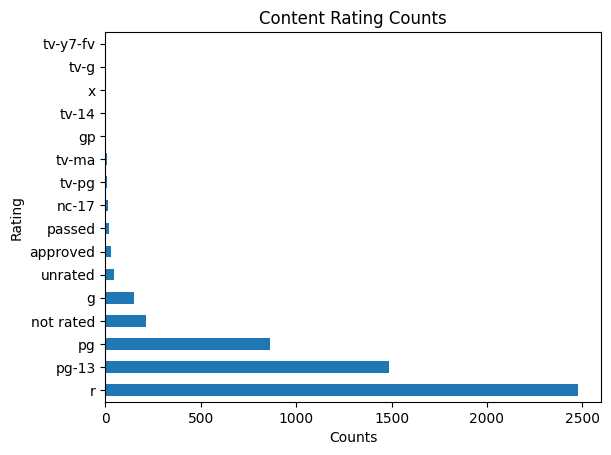

In [ ]:
# group by content rating
df_title.contentRate.value_counts().plot(kind='barh', title='Content Rating Counts', xlabel='Counts', ylabel='Rating')

<Axes: title={'center': 'Scatter of Length of Runtime vs Life-time Gross'}, xlabel='Runtime (Min)', ylabel='Gross (In Hundreds of Millions)'>

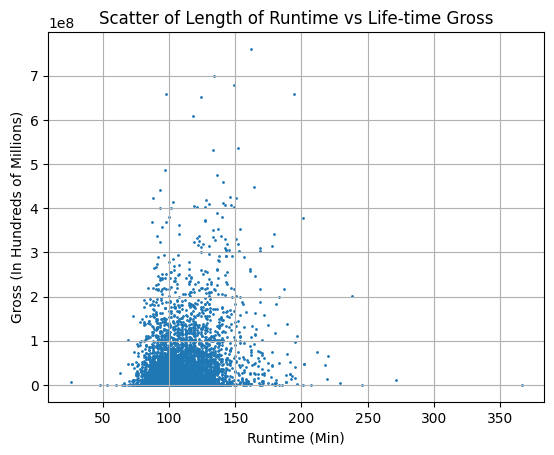

In [ ]:
# line graph of runtime vs gross
df_title.sort_values(by=['rnTimeMin']).plot.scatter(x ='rnTimeMin',
                                                    y= 'gross',
                                                    s = 1,
                                                    grid = True,
                                                    title='Scatter of Length of Runtime vs Life-time Gross',
                                                    xlabel='Runtime (Min)',
                                                    ylabel='Gross (In Hundreds of Millions)')

In [ ]:
# read in encoded data
# scale data to resemble normal
# tighten distribution range
df_encoded = pd.read_csv("process.csv")
df_encoded.drop('type', axis =1)
ss = StandardScaler()
mm = MinMaxScaler()
df_encoded[["rnTimeMin", "numVotes","imdbRtCnt" ,"imdbRtBest","imdbRtWorst","imdbRtAvg","slRateCnt","slRateAvg","gross"]] = ss.fit_transform(mm.fit_transform(df_encoded[["rnTimeMin", "numVotes","imdbRtCnt" ,"imdbRtBest","imdbRtWorst","imdbRtAvg","slRateCnt","slRateAvg","gross"]]))
df_encoded.head()

,title,title_lc,studio,directors,contentRate,rnTimeMin,genres,rlYr,rlMnth,type,primaryName,category,numVotes,imdbRtCnt,imdbRtBest,imdbRtWorst,imdbRtAvg,slRateCnt,slRateAvg,gross
0,Final Analysis,final analysis (1992),0.00000,91.00000,0.00000,0.87695,46.00000,24.00000,24.00000,0.00000,9.00000,300.00000,-0.47245,-0.41272,0.42988,0.42988,0.14250,-0.48792,-0.85491,-0.16201
1,The Bachelor,bachelor the (1999),0.00000,3.00000,9.00000,-0.33682,327.00000,12.00000,12.00000,0.00000,4.00000,2264.00000,-0.45313,-0.39266,0.42988,0.42988,-0.21297,-0.09665,-0.79229,-0.27236
2,Death to Smoochy,death to smoochy (2002),0.00000,31.00000,0.00000,0.08536,10.00000,0.00000,0.00000,0.00000,2.00000,258.00000,-0.33518,-0.27029,0.42988,0.42988,0.30049,-0.09665,0.17195,-0.48876
3,Killer Joe,killer joe (2011),0.00000,23.00000,169.00000,-0.28405,52.00000,15.00000,15.00000,0.00000,7.00000,59.00000,-0.13328,-0.06049,0.42988,0.42988,0.45847,-0.48792,1.64963,-0.59179
4,Invincible,invincible (2001),1.00000,0.00000,2.00000,1.35190,1669.00000,93.00000,93.00000,0.00000,12.00000,150.00000,-0.52572,-0.49163,-2.32621,-2.32621,-2.18778,-0.48792,0.39736,0.30999


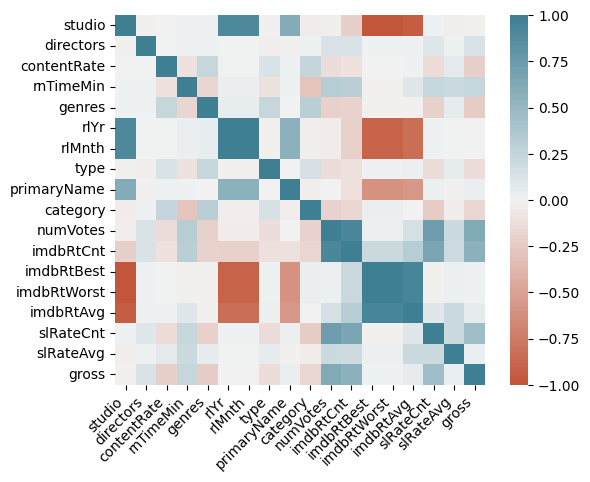

In [ ]:
# corrrelation matrix -> use the label encoded and mm/ss dataframe
cm = df_encoded.corr()
ax = sns.heatmap(
    cm,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Text(0.5, 1.0, 'Correlation w.r.t gross')

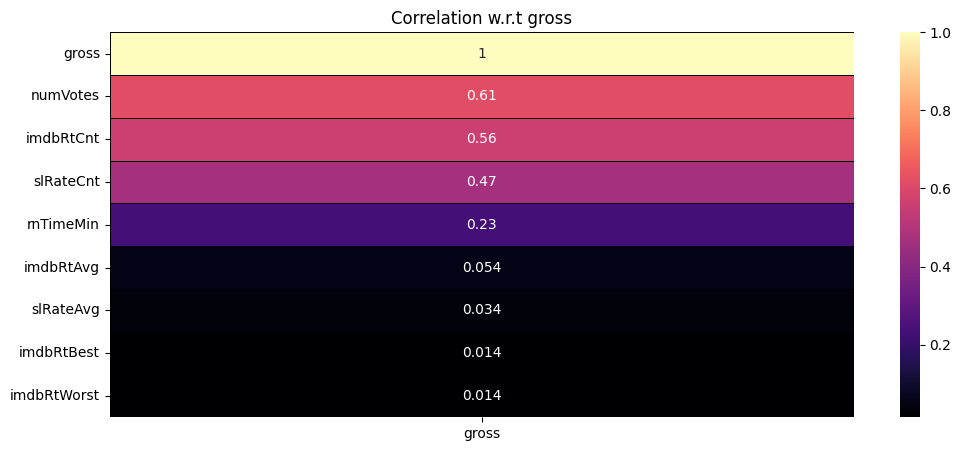

In [ ]:
# visualize the data leakage vs no data leakage
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
plt.subplot(1,1,1)
corr = df_encoded[["rnTimeMin", "numVotes","imdbRtCnt" ,"imdbRtBest","imdbRtWorst","imdbRtAvg","slRateCnt","slRateAvg","gross"]].corrwith(df_encoded['gross']).sort_values(ascending = False).to_frame()
corr.columns = ['gross']
sns.heatmap(corr,annot = True, cmap = 'magma',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t gross')


In [ ]:
corr2 = df_encoded[['imdbRtCnt','numVotes','slRateCnt']].corrwith(df_encoded['imdbRtAvg']).sort_values(ascending = False).to_frame()
corr2.columns = ['imdbRtAvg']
corr2

,imdbRtAvg
imdbRtCnt,0.32638
numVotes,0.14978
slRateCnt,0.09721


In [ ]:
corr3 = df_encoded[['imdbRtCnt','numVotes','slRateCnt']].corrwith(df_encoded['slRateAvg']).sort_values(ascending = False).to_frame()
corr3.columns = ['slRateAvg']
corr3

,slRateAvg
numVotes,0.21058
slRateCnt,0.20070
imdbRtCnt,0.19413
